<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/04_Forex_Prediction_Using_ANN/EUR_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Load library

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# 1 . Load data

In [113]:
! git clone https://github.com/trongthuan205/NC_ThuanNT ThuanNT

fatal: destination path 'ThuanNT' already exists and is not an empty directory.


In [0]:
EURUSD = pd.read_csv('/content/ThuanNT/04_Forex_Prediction_Using_ANN/GBPUSD_Candlestick_3_M_BID_01.05.2020-01.05.2020.csv')

In [0]:
data = EURUSD[EURUSD['Volume'] != 0]

In [0]:
data = data.tail(200)

In [117]:
data

,Local time,Open,High,Low,Close,Volume
200,01.05.2020 10:00:00.000 GMT+0700,1.25643,1.25645,1.25621,1.25628,0.000115
201,01.05.2020 10:03:00.000 GMT+0700,1.25629,1.25632,1.25608,1.25608,0.000066
202,01.05.2020 10:06:00.000 GMT+0700,1.25607,1.25608,1.25591,1.25591,0.000070
203,01.05.2020 10:09:00.000 GMT+0700,1.25591,1.25620,1.25591,1.25617,0.000066
204,01.05.2020 10:12:00.000 GMT+0700,1.25618,1.25620,1.25606,1.25620,0.000061
...,...,...,...,...,...,...
395,01.05.2020 19:45:00.000 GMT+0700,1.25178,1.25227,1.25165,1.25203,0.000517
396,01.05.2020 19:48:00.000 GMT+0700,1.25202,1.25240,1.25183,1.25239,0.000529
397,01.05.2020 19:51:00.000 GMT+0700,1.25238,1.25297,1.25237,1.25291,0.000361
398,01.05.2020 19:54:00.000 GMT+0700,1.25291,1.25319,1.25223,1.25247,0.000661


# 3 . Statistic data

In [118]:
data.describe()

,Open,High,Low,Close,Volume
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.255345,1.255587,1.255080,1.255330,0.000372
std,0.001335,0.001297,0.001379,0.001343,0.000222
min,1.251500,1.251840,1.251390,1.251510,0.000024
25%,1.255008,1.255262,1.254618,1.254980,0.000213
50%,1.255825,1.256040,1.255585,1.255800,0.000362
75%,1.256240,1.256460,1.256032,1.256217,0.000507
max,1.257130,1.257990,1.256960,1.257150,0.001298


In [119]:
data.info

<bound method DataFrame.info of                            Local time     Open  ...    Close    Volume
200  01.05.2020 10:00:00.000 GMT+0700  1.25643  ...  1.25628  0.000115
201  01.05.2020 10:03:00.000 GMT+0700  1.25629  ...  1.25608  0.000066
202  01.05.2020 10:06:00.000 GMT+0700  1.25607  ...  1.25591  0.000070
203  01.05.2020 10:09:00.000 GMT+0700  1.25591  ...  1.25617  0.000066
204  01.05.2020 10:12:00.000 GMT+0700  1.25618  ...  1.25620  0.000061
..                                ...      ...  ...      ...       ...
395  01.05.2020 19:45:00.000 GMT+0700  1.25178  ...  1.25203  0.000517
396  01.05.2020 19:48:00.000 GMT+0700  1.25202  ...  1.25239  0.000529
397  01.05.2020 19:51:00.000 GMT+0700  1.25238  ...  1.25291  0.000361
398  01.05.2020 19:54:00.000 GMT+0700  1.25291  ...  1.25247  0.000661
399  01.05.2020 19:57:00.000 GMT+0700  1.25252  ...  1.25324  0.000470

[200 rows x 6 columns]>

# 3 . Visualize data

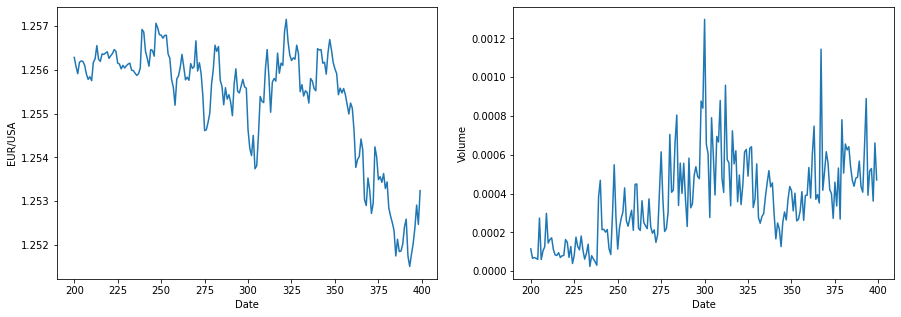

In [120]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.plot(data['Close'])
plt.xlabel("Date") 
plt.ylabel("EUR/USA")
plt.subplot(1,2,2)
plt.plot(data['Volume'])
plt.xlabel("Date") 
plt.ylabel("Volume")
plt.show()

# 4 . Split data

In [121]:
X = np.array(data['Open']).reshape(-1, 1)
X.shape

(200, 1)

In [122]:
y = np.array(data['Close']).reshape(-1, 1)
y.shape

(200, 1)

# 5 . Build and Train model

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [126]:
epochs_hist = model.fit(X, y, epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2703
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 5.0768e-04
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 3.0141e-04
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 1.6882e-04
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 7.3896e-05
Epoch 13/100
7/7 [===========================

In [127]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# 6 . Evaluate model

In [128]:
epochs_hist.history.keys()

dict_keys(['loss'])

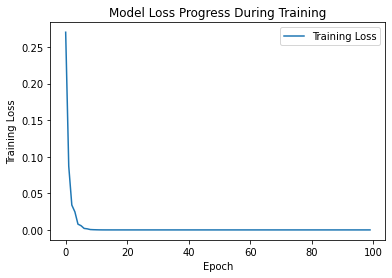

In [129]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [130]:
model.get_weights()

[array([[0.7136257]], dtype=float32), array([0.3602603], dtype=float32)]

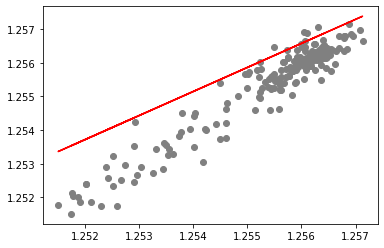

In [131]:
y_pred = model.predict(X)
plt.scatter(data['Open'], data['Close'], color = 'grey')
plt.plot(data['Open'], y_pred, color = 'red')

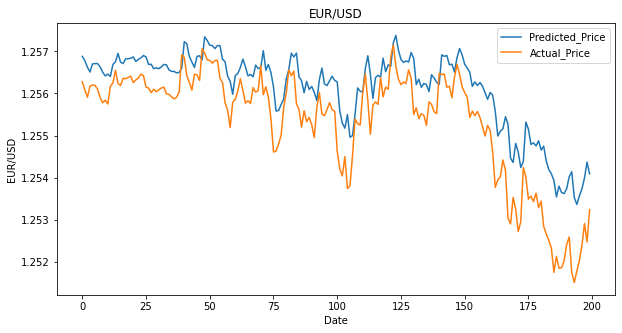

In [132]:
plt.figure(figsize = (10,5))
plt.plot(y_pred)
plt.plot(y)
plt.xlabel('Date')
plt.ylabel('EUR/USD')
plt.title('EUR/USD')
plt.legend(['Predicted_Price','Actual_Price'])

In [0]:
#val = float(input('Nhap ti gia: '))
#print(model.predict([val]))